# Classification in Practice

In this laboratory session we will gain some experience working with linear models for **classification** (we already saw how to do regression in a previous lab).

We will follow the same general structure... with one exception -- for this laboratory we will begin with **synthetic** datasets. 

## Part 1: Working with Synthetic Classification Problems

Generating synthetic datasets allows us to gain insight into how classifiers work. We will use some functionality of Scikit-learn to generate -- in a controlled manner -- synthetic classification problems of with various characteristics.

**Note**: When working with these synthetic datasets we will *not* go to the trouble of generating train/test splits -- we are only interested in studying how classifiers work to **separate** the training data.

### Exercise 1.1: Generating a dataset

First, have a look at the documentation for [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs). This is one of the easiest ways to generate /simple/ classification problems. Study the documentation and then use `make_blobs` to generate an **EASY** dataset for a **two-class** classification problem with 100 samples per class and 2 input features. What does **EASY** mean? How can we determine, qualitatively, that the randomly generated dataset is "easy"? Make the problem *easy*, but not *too easy*.

**Hint**: You will probably want to develop a *visualization* for datasets, and then *abstract* it into a function you can call later for other datasets. 

In [2]:
# Your code here.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

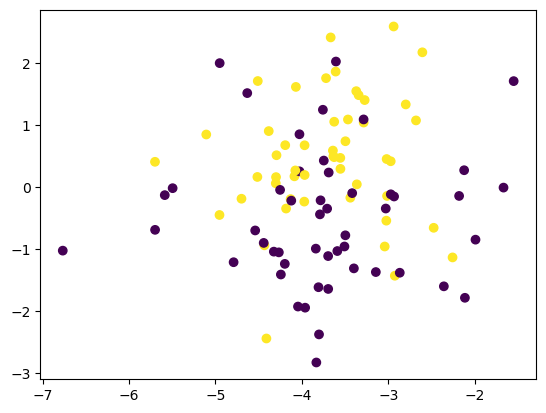

In [11]:
(Xs, ys) = make_blobs(centers=2)
plt.scatter(Xs[:,0], Xs[:,1], c=ys)

### Exercise 1.2: "Solving" the dataset

Train a classifier that is *perfectly* classifies the dataset you created above. Any of the the three classifiers mentioned in the *Capsule Lecture* should do well. Try one, or try all three. Be sure to verify that the classifier does *indeed* classify all training points correctly.

**Hint**: You might want to look at [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for this.

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report

# Your code here.
ldc = LinearDiscriminantAnalysis()
qdc = QuadraticDiscriminantAnalysis()
svc = LinearSVC()
ksvc = SVC(kernel='rbf', gamma=100)


# Fit and evaluate on train set.
for model in [ldc, qdc, svc, ksvc]:
    model.fit(Xs, ys)
    print(f'{type(model).__name__}:')
    print(classification_report(ys, model.predict(Xs)))

LinearDiscriminantAnalysis:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75        50
           1       0.75      0.72      0.73        50

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100

QuadraticDiscriminantAnalysis:
              precision    recall  f1-score   support

           0       0.77      0.68      0.72        50
           1       0.71      0.80      0.75        50

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100

LinearSVC:
              precision    recall  f1-score   support

           0       0.73      0.76      0.75        50
           1       0.75      0.72      0.73        50

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weig

### Exercise 1.3: Visualizing the decision surfaces

One of the best ways to understand how a classifier works is to visualize the decision boundaries. Use [sklearn.inspection.DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) to create a visualization of the *dataset* and the *decision boundaries* for your classifier.

**Note**: This is another great opportunity to apply *functional abstraction* and make a **reusable** visualization that you can reuse (for example in the next exercise).

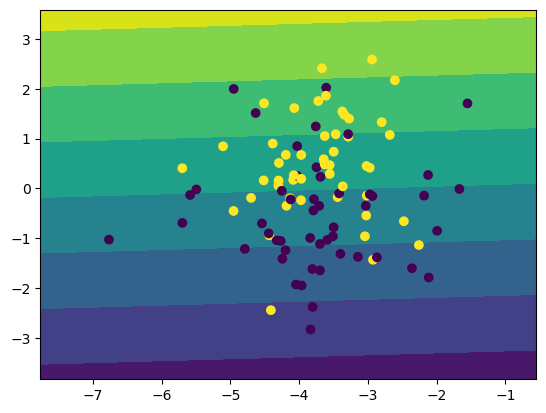

<Figure size 640x480 with 0 Axes>

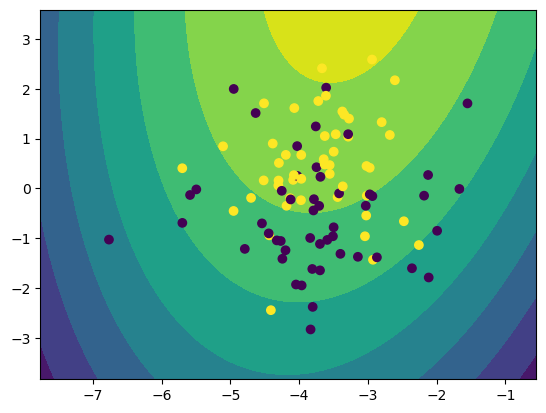

<Figure size 640x480 with 0 Axes>

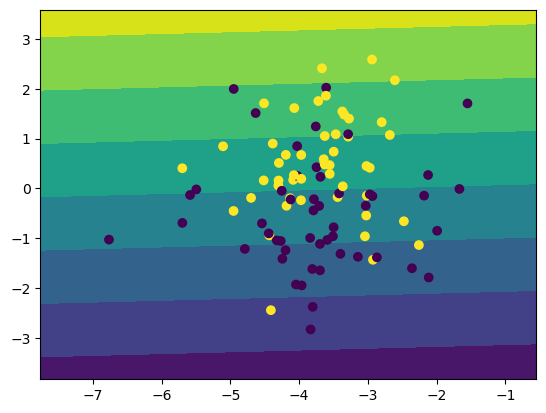

<Figure size 640x480 with 0 Axes>

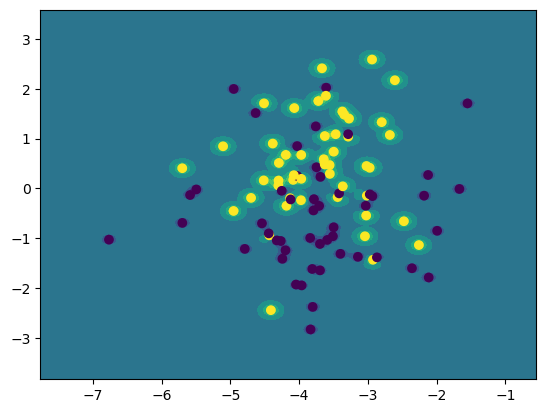

In [17]:
from sklearn.inspection import DecisionBoundaryDisplay

# Your code here.
DecisionBoundaryDisplay.from_estimator(ldc, Xs, response_method='auto')
plt.scatter(Xs[:,0], Xs[:,1], c=ys)

plt.figure()
DecisionBoundaryDisplay.from_estimator(qdc, Xs, response_method='auto')
plt.scatter(Xs[:,0], Xs[:,1], c=ys)

plt.figure()
DecisionBoundaryDisplay.from_estimator(svc, Xs, response_method='auto')
plt.scatter(Xs[:,0], Xs[:,1], c=ys)

plt.figure()
DecisionBoundaryDisplay.from_estimator(ksvc, Xs, response_method='auto', grid_resolution=1000)
plt.scatter(Xs[:,0], Xs[:,1], c=ys)



### Exercise 1.4: A harder dataset

Repeat the exercises above, but first generate a **hard** dataset that is not linearly separable. Observe how linear classifiers fail to correctly classify the training data. How can we make these classifiers capable of "solving" this harder dataset? Try to find an explicit embedding that makes the problem linearly separable in the embedding space. Visualize the decision boundaries in the **original** space (you will need to spend some time with the documentation for `DecisionBoundaryDisplay` to make this work).

In [126]:
# Your code here.

---
## Part 2: A Real Dataset

In the second set of exercises we will work with a classic dataset for classification: the Iris Flower Classification Dataset. It is a fairly easy dataset to work with since it is low-dimensional and small. We start by loading the dataset, and then proceed with our usual protocol: "playing" with the data, creating train/test splits, and building and evaluating a first classifier. 

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

# Load the iris classification dataset to get started.
df = load_iris(as_frame=True)
df = ds.frame
targets = df.target
df = df.drop(columns=['target'])

In [41]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Exercise 2.1: Play with the data

Use everything we have learned about *exploratory data analysis* to study the nature and characteristics of this classification problem. Are the classes equally represented? How many features are there in input? How are input features scaled? **Be creative** and **summarize** your findings with analysis along the way.

In [20]:
# Your data playground here.
print(ds.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Exercise 2.2: Your Turn

Design an experiment to decide which of the three classifiers we have seen performs best on this dataset. Some things to keep in mind:
+ You will probably want to use [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to perform K-fold cross-validation to ensure you are *robustly* estimating performance.
+ All three of the classifier models we have used support **regularization**, which might be an interesting hyperparameter to cross-validate. Unfortunately they use slightly different terminologies:
  + in `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` it is called `shrinkage`
  + in `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis` it is called `reg_param`
  + and in `sklearn.svm.LinearSVC` it is called `C` -- but the regularization performed is 1/C!
  
**Important**: Remember to *document* your findings and analyses along the way. Summarize and justify your final conclusions.

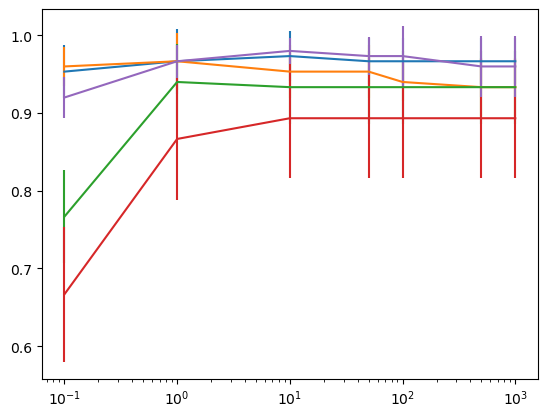

In [84]:
# Your code here.
from sklearn.model_selection import cross_val_score

def crossval_SVM(model, Cs):
    means = []
    stds = []
    for C in Cs:
        cls = model(C=C)
        accs = cross_val_score(cls, df, targets, cv=5)
        means.append(accs.mean())
        stds.append(accs.std())
    return (means, stds)

Cs = [0.1, 1.0, 10.0, 50.0, 100.0, 500.0, 1000.0]
(lsvm_means, lsvm_stds) = crossval_SVM(LinearSVC, Cs)
plt.errorbar(Cs, lsvm_means, yerr=lsvm_stds)
plt.xscale('log')
for gamma in [1, 10, 20, 'scale']:
    (gsvm_means, gsvm_stds) = crossval_SVM(lambda C: SVC(C=C, gamma=gamma), Cs)
    plt.errorbar(Cs, gsvm_means, yerr=gsvm_stds)

---
## Part 3: A Harder Dataset

OK, now let's switch to the **digits** dataset which should be a bit more challenging. This should be easy by now, and if you have been careful about **functional abstraction** you should be able to reuse much of the functionality from above.

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits

ds_digits = load_digits()
df_digits = pd.DataFrame(ds_digits.data)     # Why are there no column names?
targets_digits = pd.Series(ds_digits.target)

### Exercise 3.1: Exploratory data analysis

You know the drill, see what this dataset is made of.

In [89]:
# Your data playground here.
print(ds_digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

### Exercise 3.2: Visualize Some Images

Now we are working with (very small) images. There a useful Matplotlib function for visualizing images is `imshow()`. Use it like this:

 `plt.imshow(df_digits.iloc[0,:].to_numpy().reshape(8,8), cmap='gray')`

 **NOTE**: The Pandas DataFrame structure is kind of getting in our way here -- we have to extract a row, then **convert** it to a numpy array, and then **resize** it to (8,8) to view it.

View some images from the dataset.

In [92]:
df_digits.max()

0      0.0
1      8.0
2     16.0
3     16.0
4     16.0
      ... 
59    16.0
60    16.0
61    16.0
62    16.0
63    16.0
Length: 64, dtype: float64

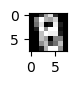

In [103]:
# Your code here.
plt.figure(figsize=(0.5,0.5))
plt.imshow(df_digits.iloc[500].to_numpy().reshape((8,8)), cmap='gray')

### Exercise 3.3: Find the best classifier (of the ones we have seen)

You should now be very familiar with this game and if you consolidated the pieces you used before, this exercise should be easy. As always, document, summarize, and justify your conclusions and analyses. If you like, try out some other classifiers to see if you can get better (but still robust!) performance on the digits dataset.

In [110]:
# Your code here.
model = QuadraticDiscriminantAnalysis(reg_param=0.001)
cross_val_score(model, df_digits, targets_digits).mean()

np.float64(0.917647787062829)

In [111]:
model = LinearDiscriminantAnalysis()
cross_val_score(model, df_digits, targets_digits).mean()

np.float64(0.9081832250077376)

In [114]:
np.linalg.matrix_rank(df_digits.cov())

np.int64(61)

In [126]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(df_digits)

,n_components,20
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [140]:
pca = PCA(n_components=25)
pca.fit(df_digits)
Xs = pca.transform(df_digits)

In [143]:
model = QuadraticDiscriminantAnalysis(reg_param=0.0)
cross_val_score(model, Xs, targets_digits).mean()

np.float64(0.9566248839368615)

In [144]:
model = LinearDiscriminantAnalysis()
cross_val_score(model, Xs, targets_digits).mean()

np.float64(0.9131987000928504)

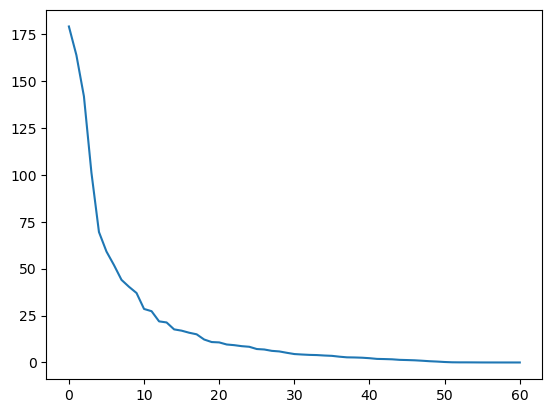

In [125]:
plt.plot(pca.explained_variance_)